In [1]:
# Show plots inline, and load main getdist plot module and samples class
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
import pylab as mplot
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.figsize'] = (16.,8.)
#import config

from chainconsumer import ChainConsumer


GetDist Version: 1.3.4, Matplotlib version: 3.1.1


In [2]:
def get_names(filename):
    """
    Function to obtain the names of the parameters of your chain
    """
    data = np.genfromtxt(filename, names=True)
    names = np.array(data.dtype.names)
    #print(names)
    #print(len(names))
    return names

def get_indices(filename, list_vars):
    """
    Function to obtain the index in a multinest chain from certain variables.
    """
    indices = []
    names = get_names(filename)
    for var in list_vars:
        indices.extend([i for i,n in enumerate(names) if var==n])
    #return indices, names[indices]
    return indices

def get_om_s8(filename):
    # might be useful later..
    data = np.loadtxt(filename)
    nsample = get_nsample(filename)
    data_params = []
    data_params.append([data[-nsample:,0], data[-nsample:,-3]*(data[-nsample:,0]/0.3)**(0.5)])
    data_params = np.array(data_params[0][:]).T
    weights = data[-nsample:,-1]
    return data_params, weights

def compute_s8(om, sigma_8):
    return sigma_8*(om/0.3)**0.5

In [3]:
dir = '../../data_vectors/gaussian_sims/071222/area12300/July14/chains/'
nlbins = 5

name_plots = 'gs-wcdm'

chainfile_0 = dir + 'gaussian_sims_3x2pt_fourier_w0-wa.txt'
name_0 = r'Harmonic space'

chainfile_1 = dir + 'gaussian_sims_3x2pt_real_w0-wa.txt'
name_1 = r'Real space'

chainfile_2 = dir + 'gaussian_sims_3x2pt_fourier_w0-wa_fixed_sys.txt'
name_2 = r'Harmonic space fixed sys.'

chainfile_3 = dir + 'gaussian_sims_3x2pt_real_w0-wa_fixed_sys.txt'
name_3 = r'Real space fixed sys.'

chainfile_4 = dir + 'prior_3x2pt_wcdm.txt'
name_4 = r'Prior'


colors = ["#474747", "#6992C2", "#C0E0FF", "#FADA77", "#FEB580", 'tomato', 'firebrick']


In [4]:
chain_0 = np.loadtxt(chainfile_0)
chain_1 = np.loadtxt(chainfile_1)
chain_2 = np.loadtxt(chainfile_2)
chain_3 = np.loadtxt(chainfile_3)
chain_4 = np.loadtxt(chainfile_4)
print(len(chain_0))
print(len(chain_1))
print(len(chain_2))
print(len(chain_3))
print(len(chain_4))

256640
259600
444800
436480
20000


In [5]:
get_names(chainfile_0)

array(['cosmological_parametersomega_c', 'cosmological_parametersomega_b',
       'cosmological_parametersn_s', 'cosmological_parametersa_s',
       'cosmological_parametersh0', 'cosmological_parametersw',
       'cosmological_parameterswa', 'firecrown_two_pointia_bias',
       'firecrown_two_pointalphaz',
       'firecrown_two_pointsource_0_mult_bias',
       'firecrown_two_pointsource_1_mult_bias',
       'firecrown_two_pointsource_2_mult_bias',
       'firecrown_two_pointsource_3_mult_bias',
       'firecrown_two_pointsource_4_mult_bias',
       'firecrown_two_pointlens_0_bias', 'firecrown_two_pointlens_1_bias',
       'firecrown_two_pointlens_2_bias', 'firecrown_two_pointlens_3_bias',
       'firecrown_two_pointlens_4_bias',
       'firecrown_two_pointlens_0_delta_z',
       'firecrown_two_pointlens_1_delta_z',
       'firecrown_two_pointlens_2_delta_z',
       'firecrown_two_pointlens_3_delta_z',
       'firecrown_two_pointlens_4_delta_z',
       'firecrown_two_pointsource_0_delta

In [18]:
def get_cosmopars(chainfile, model='lcdm'):
    cosmo_parnames = ['cosmological_parametersomega_m', 'cosmological_parametersh0',
                  'cosmological_parametersomega_b', 'cosmological_parametersn_s','COSMOLOGICAL_PARAMETERSSIGMA_8']
    chain = np.loadtxt(chainfile)
    indices = get_indices(chainfile, cosmo_parnames)
    omega_m = chain[:,indices[0]]
    sigma_8 = chain[:,indices[-1]]
    s8 = sigma_8*(omega_m/0.3)**(0.5)
    cosmo_pars = chain[:,indices].T
    # add s8 to the array
    cosmo_pars = np.vstack((cosmo_pars, [s8])).T
    if model=='lcdm':
        return cosmo_pars
    if model=='wcdm':
        w_index = get_indices(chainfile, ['cosmological_parametersw'])
        w = chain[:,w_index[0]]
        cosmo_pars = cosmo_pars.T 
        # add w at the end of the list
        cosmo_pars = np.vstack((cosmo_pars, [w])).T
        return cosmo_pars
    
    
def get_cosmopars_reduced(chainfile, model='lcdm'):
    cosmo_parnames = ['cosmological_parametersomega_m', 'COSMOLOGICAL_PARAMETERSSIGMA_8']
    chain = np.loadtxt(chainfile)
    indices = get_indices(chainfile, cosmo_parnames)
    omega_m = chain[:,indices[0]]
    sigma_8 = chain[:,indices[-1]]
    s8 = sigma_8*(omega_m/0.3)**(0.5)
    cosmo_pars = chain[:,indices].T
    # add s8 to the array
    cosmo_pars = np.vstack((cosmo_pars, [s8])).T
    if model=='lcdm':
        return cosmo_pars
    if model=='wcdm':
        w_index = get_indices(chainfile, ['cosmological_parametersw'])
        w = chain[:,w_index[0]]
        cosmo_pars = cosmo_pars.T 
        # add w at the end of the list
        cosmo_pars = np.vstack((cosmo_pars, [w])).T
        return cosmo_pars
    
def get_pars(chainfile, parnames, burnin, chain):
    indices = get_indices(chainfile, parnames)    
    chain_sel = chain[burnin:,indices]
    chain_sel.T[3] = chain_sel.T[3]*10**9  #normalize A_s
    return chain_sel

def get_prior_chain(filename, list_vars, chain):
    """
    Function to obtain the index in a multinest chain from certain variables.
    """
    indices = []
    names = get_names(filename)
    for var in list_vars:
        indices.extend([i for i,n in enumerate(names) if var==n])
    #return indices, names[indices]
    chain_sel = chain[:,indices]
    mask_nans = ~np.isnan(chain_sel.T[2])
    chain_ind_no_nans = chain_4[:,indices][mask_nans]
    chain_ind_no_nans.T[3] = chain_ind_no_nans.T[3]*10**9  #normalize A_s
    return chain_ind_no_nans   

## Plot cosmological parameters

In [7]:
# FireCrown names
cosmo_parnames = ['cosmological_parametersomega_c', 'cosmological_parametersomega_b','COSMOLOGICAL_PARAMETERSSIGMA_8', 'cosmological_parametersa_s', 
       'cosmological_parametersn_s',  'cosmological_parametersh0', 'COSMOLOGICAL_PARAMETERSOMEGA_M',  'cosmological_parametersw','cosmological_parameterswa']
cosmo_names = ['$\Omega_c$','$\Omega_b$','$\sigma_8$',r'$A_s \times 10^{-9}$', '$n_s$','$h$',   '$\Omega_m$', '$w_0$', '$w_a$']
cosmo_truths = [2.199999e-01, 4.479270e-02, 8.000000e-01, 2.16, 9.630000e-01,  0.71,   2.647887e-01, -1, 0]

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccccccccc}
        \hline
		Model & $\Omega_c$ & $\Omega_b$ & $\sigma_8$ & $A_s \times 10^{-9}$ & $n_s$ & $h$ & $\Omega_m$ & $w_0$ & $w_a$ \\ 
		\hline
		Prior & $0.187^{+0.075}_{-0.083}$ & $\left( 44.7^{+7.9}_{-7.7} \right) \times 10^{-3}$ & $0.72^{+0.31}_{-0.33}$ & $2.16^{+0.49}_{-0.48}$ & $0.964^{+0.075}_{-0.074}$ & $0.714^{+0.055}_{-0.050}$ & $0.230^{+0.081}_{-0.088}$ & $-1.11^{+0.49}_{-0.52}$ & $-0.37^{+0.86}_{-0.98}$ \\ 
		Harmonic space & $0.218^{+0.019}_{-0.014}$ & $\left( 44.7^{+5.0}_{-4.6} \right) \times 10^{-3}$ & $0.798^{+0.021}_{-0.029}$ & $2.025^{+0.098}_{-0.120}$ & $0.955^{+0.017}_{-0.018}$ & $0.729^{+0.034}_{-0.035}$ & $0.263^{+0.021}_{-0.016}$ & $-1.09\pm 0.18$ & $0.27^{+0.43}_{-0.47}$ \\ 
		Harmonic space fixed sys. & $\left( 210.7^{+9.7}_{-8.8} \right) \times 10^{-3}$ & $\left( 42.8^{+5.3}_{-4.2} \right) \times 10^{-3}$ & $0.809^{+0.012}_{-0.013}$ & $2.07\pm 0.14$ & $0.954^{

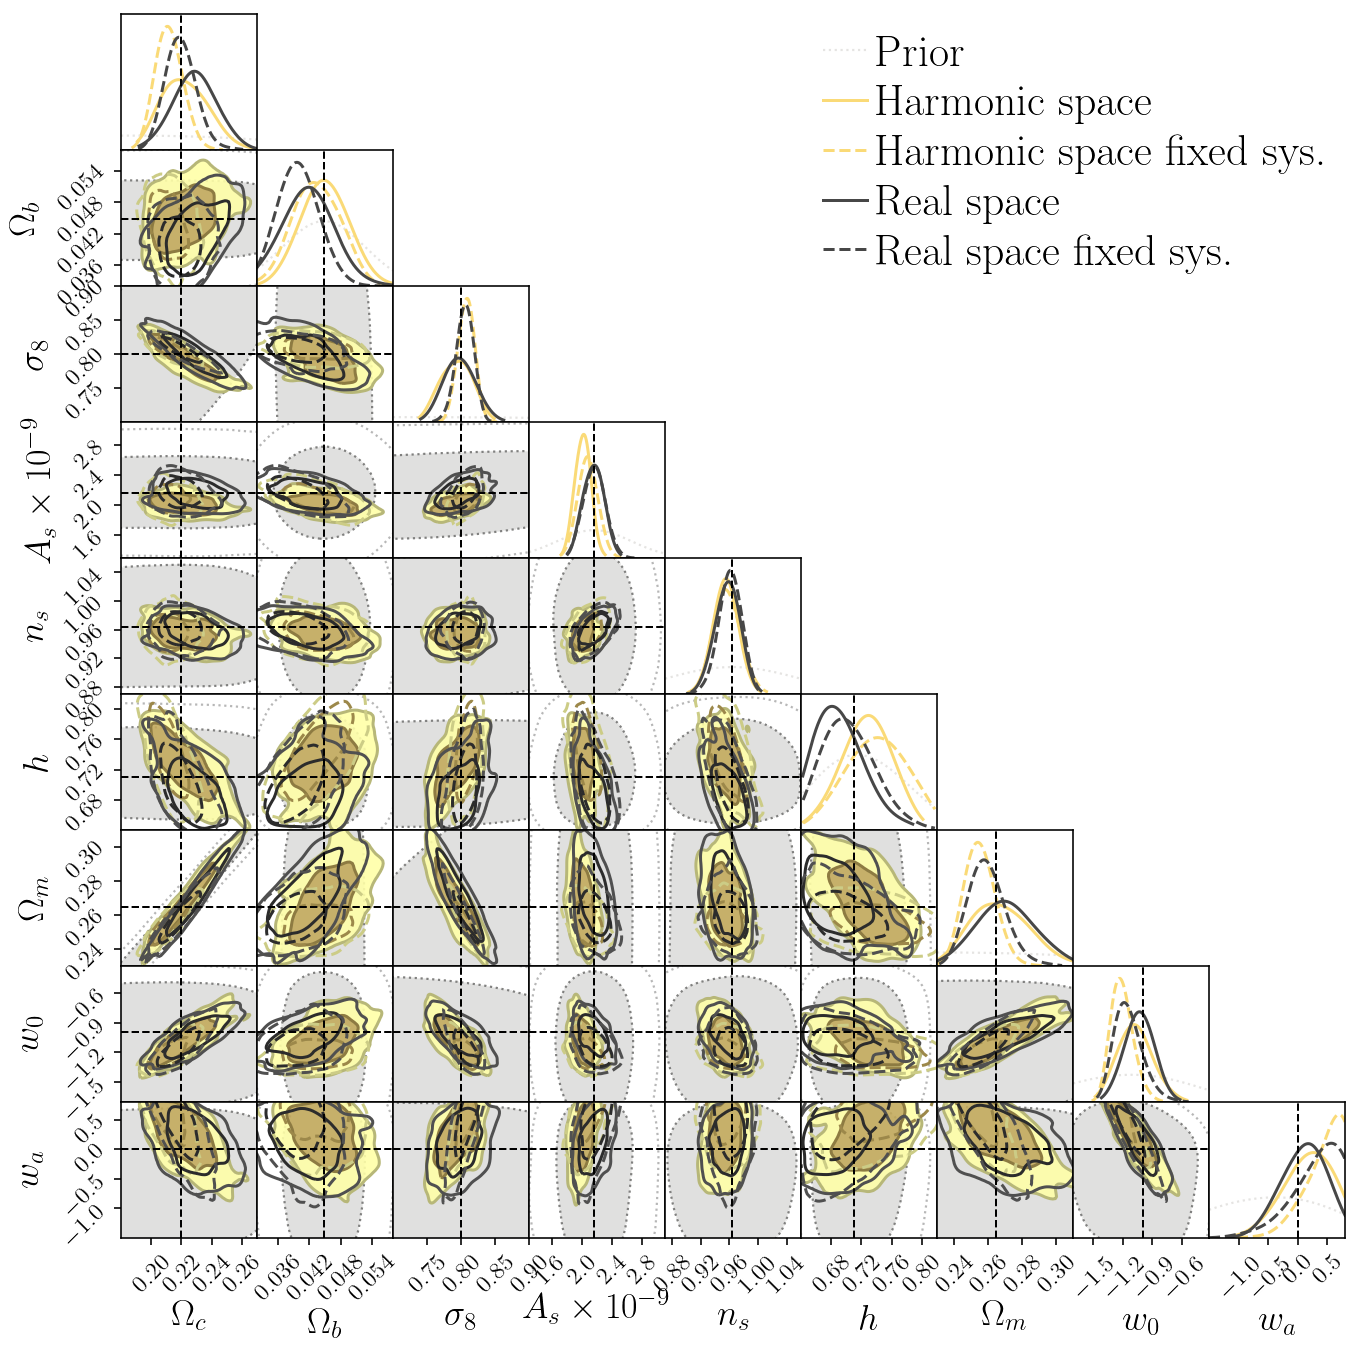

In [20]:
# With EMCEE there are no weights
# Cosmo parameters
burnin = 150000

cosmo0 = get_pars(chainfile_0, cosmo_parnames, burnin, chain_0) 
cosmo1 = get_pars(chainfile_1, cosmo_parnames, burnin, chain_1)
cosmo2 = get_pars(chainfile_2, cosmo_parnames, burnin, chain_2)
cosmo3 = get_pars(chainfile_3, cosmo_parnames, burnin, chain_3)
cosmo4 = get_prior_chain(chainfile_4, cosmo_parnames, chain_4) # Omega_m has nans in it

c = ChainConsumer()

c.add_chain(cosmo4, parameters=cosmo_names, name=name_4)
c.add_chain(cosmo0, parameters=cosmo_names, name=name_0)
c.add_chain(cosmo2, parameters=cosmo_names, name=name_2)
c.add_chain(cosmo1, parameters=cosmo_names, name=name_1)
c.add_chain(cosmo3, parameters=cosmo_names, name=name_3)

def call_configure(c):
    c.configure(kde=[3.,3.,3.,3.,3.0,1,1], shade=[True, True, False,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=["#E5E4E2", colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[ 1.1, 1.5, 1.5,1.5, 1.5, 1], linestyles=[":", "-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(5,5), truth=cosmo_truths, extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.7, -0.33), (-1.5, 0.8)])
fig.set_size_inches(5. + fig.get_size_inches())
fig.savefig(dir[:-7] + 'plots/%s_%d.png'%(name_plots, burnin), tight_layout=True, dpi=300)
fig.savefig(dir[:-7] + 'plots/%s_%d.pdf'%(name_plots, burnin), tight_layout=True)

# Table values

In [ ]:
# With EMCEE there are no weights
# Cosmo parameters
cosmo_parnames = ['COSMOLOGICAL_PARAMETERSSIGMA_8', 'COSMOLOGICAL_PARAMETERSOMEGA_M', 'COSMOLOGICAL_PARAMETERSS_8','cosmological_parametersw','cosmological_parameterswa' ]
cosmo_names = ['$\sigma_8$','$\Omega_m$', '$S_8$','$w_0$', '$w_a$']
#cosmo_truths = [2.647887e-01, 0.7515866949]#,#8.000000e-01]

# With EMCEE there are no weights
# Cosmo parameters
burnin = 150000

cosmo0 = get_indices(chainfile_0, cosmo_parnames)
cosmo1 = get_indices(chainfile_1, cosmo_parnames)
cosmo2 = get_indices(chainfile_2, cosmo_parnames)
cosmo3 = get_indices(chainfile_3, cosmo_parnames)
c = ChainConsumer()

c.add_chain(chain_0[burnin:,cosmo0], parameters=cosmo_names, name=name_0)
c.add_chain(chain_2[burnin:,cosmo2], parameters=cosmo_names, name=name_2)
c.add_chain(chain_1[burnin:,cosmo1], parameters=cosmo_names, name=name_1)
c.add_chain(chain_3[burnin:,cosmo3], parameters=cosmo_names, name=name_3)

def call_configure(c):
    c.configure(kde=[3.,3.,3.,3.,3.0,1,1], shade=[True, True,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=["#e5e4e2", colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[1.1, 1.5, 1.5,1.5, 1.5, 1], linestyles=[":", "-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)

table = c.analysis.get_latex_table()
print(table)

# Plot the rest of the parameters

In [ ]:
parnames = ['firecrown_two_pointsource_0_mult_bias',
       'firecrown_two_pointsource_1_mult_bias',
       'firecrown_two_pointsource_2_mult_bias',
       'firecrown_two_pointsource_3_mult_bias',
       'firecrown_two_pointsource_4_mult_bias']
names = ['$m_1$', '$m_2$', '$m_3$', '$m_4$', '$m_5$']
truths = [0., 0., 0., 0., 0.]
#widths = np.array([0.013]*len(truths))
#prior = np.random.multivariate_normal(truths,np.diagflat(widths**2),1000)

# With EMCEE there are no weights
# Cosmo parameters
burnin = 150000

pars0 = get_indices(chainfile_0, parnames)
pars1 = get_indices(chainfile_1, parnames)
pars4 = get_indices(chainfile_4, parnames)

c = ChainConsumer()
#c.add_chain(prior, parameters=names, name='Prior')
c.add_chain(chain_4[:,pars4], parameters=names, name=name_4)
c.add_chain(chain_0[burnin:,pars0], parameters=names, name=name_0)
c.add_chain(chain_1[burnin:,pars1], parameters=names, name=name_1)


def call_configure(c):
    c.configure(kde=[3.,3.,3.,3.,3.0,1,1], shade=[True, True,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=["#E5E4E2", colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[1.1, 1.5, 1.5,1.5, 1.5, 1], linestyles=[":", "-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(5,5), truth=truths) #extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.6, -0.33), (-1.8, 1.)])
fig.set_size_inches(5. + fig.get_size_inches())
fig.savefig(dir[:-7] + 'plots/%s_%d_ms.png'%(name_plots, burnin),  bbox_inches="tight", dpi=300)
fig.savefig(dir[:-7] + 'plots/%s_%d_ms.pdf'%(name_plots, burnin),  bbox_inches="tight")

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccccc}
        \hline
		Model & $b_1$ & $b_2$ & $b_3$ & $b_4$ & $b_5$ \\ 
		\hline
		Fourier space & $1.245^{+0.034}_{-0.029}$ & $1.386^{+0.040}_{-0.034}$ & $1.526^{+0.041}_{-0.038}$ & $1.673^{+0.043}_{-0.045}$ & $1.829^{+0.044}_{-0.051}$ \\ 
		Real space & $1.238^{+0.030}_{-0.031}$ & $1.384\pm 0.031$ & $1.515^{+0.034}_{-0.033}$ & $1.659^{+0.034}_{-0.037}$ & $1.805^{+0.039}_{-0.045}$ \\ 
		\hline
    \end{tabular}
\end{table}


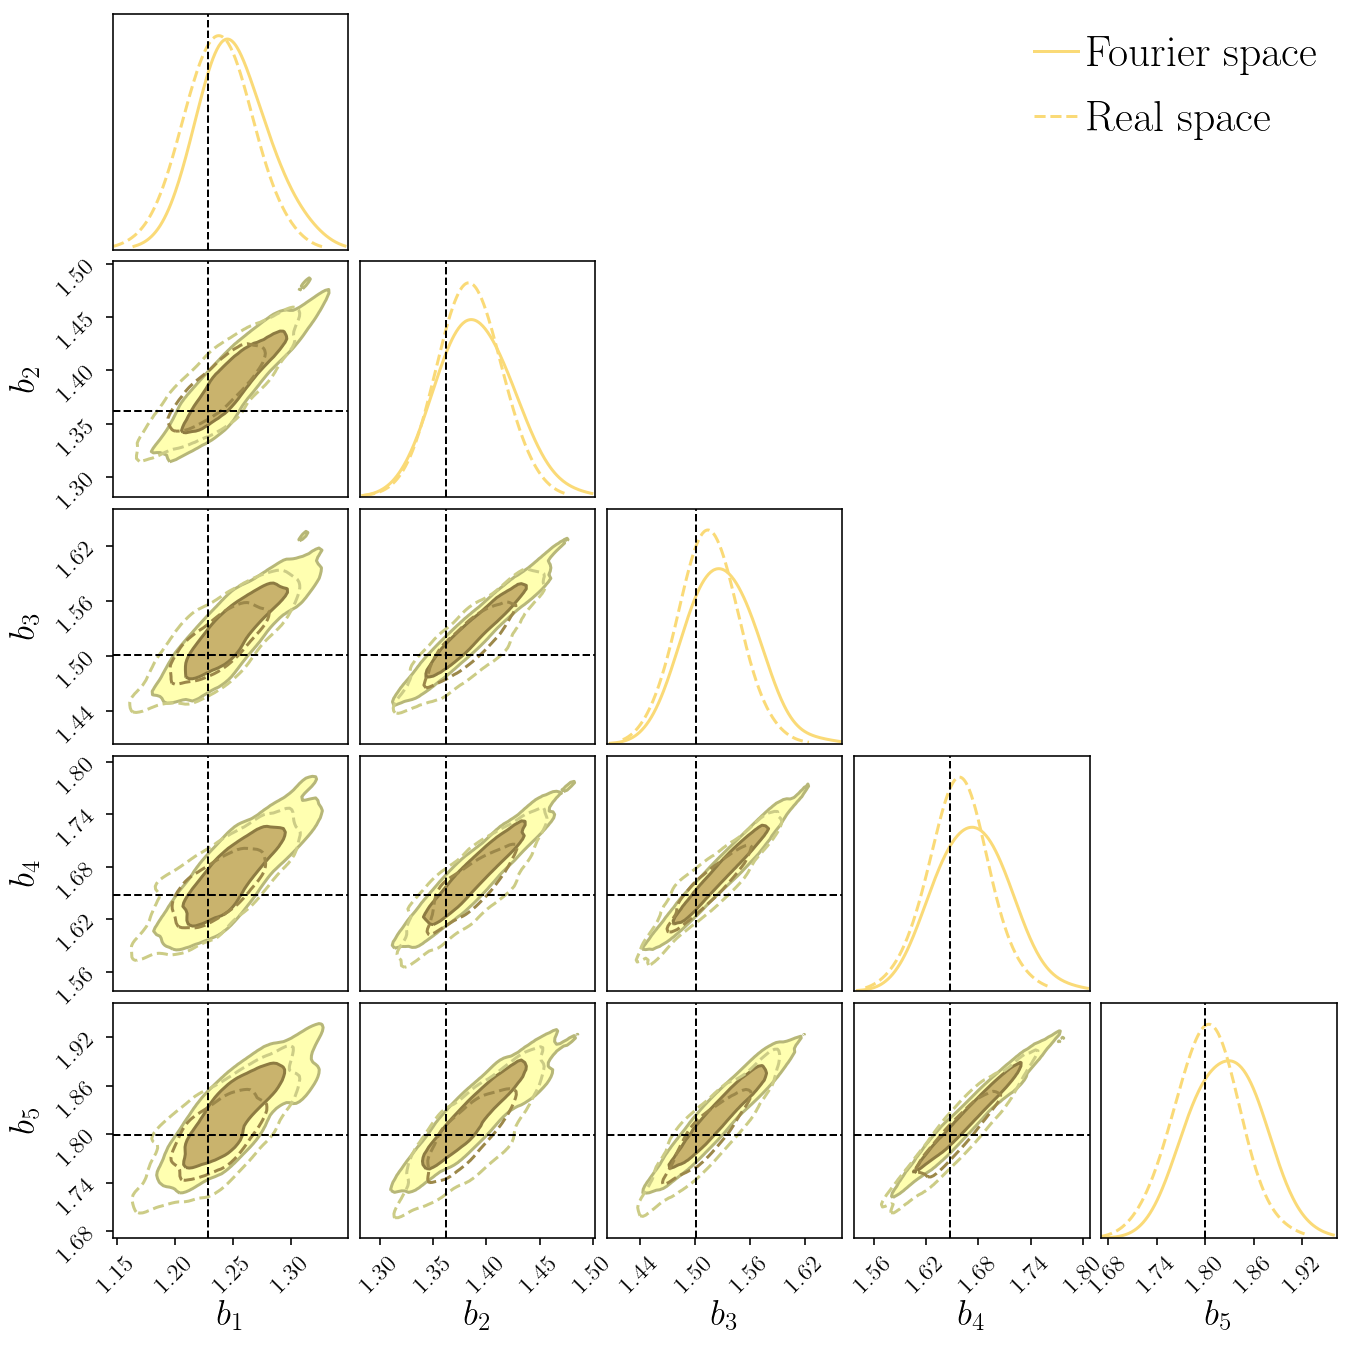

In [36]:
parnames = ['firecrown_two_pointlens_0_bias', 'firecrown_two_pointlens_1_bias',
       'firecrown_two_pointlens_2_bias', 'firecrown_two_pointlens_3_bias',
       'firecrown_two_pointlens_4_bias']
names = ['$b_1$', '$b_2$', '$b_3$', '$b_4$', '$b_5$']
truths = [1.229, 1.362, 1.502, 1.648, 1.799]

# With EMCEE there are no weights
# Cosmo parameters
burnin = 150000

pars0 = get_indices(chainfile_0, parnames)
pars1 = get_indices(chainfile_1, parnames)

c = ChainConsumer()

c.add_chain(chain_0[burnin:,pars0], parameters=names, name=name_0)
c.add_chain(chain_1[burnin:,pars1], parameters=names, name=name_1)

def call_configure(c):
    c.configure(kde=[3.,3.,3.,3.,3.0,1,1], shade=[True, False,False,False,False,False, False], shade_alpha=[0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=[ colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[ 1.5, 1.5,1.5, 1.5, 1], linestyles=["-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(5,5), truth=truths) #extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.6, -0.33), (-1.8, 1.)])
fig.set_size_inches(5. + fig.get_size_inches())
fig.savefig(dir[:-7] + 'plots/%s_%d_bias.png'%(name_plots, burnin),  bbox_inches="tight", dpi=300)
fig.savefig(dir[:-7] + 'plots/%s_%d_bias.pdf'%(name_plots, burnin),  bbox_inches="tight")

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{ccccccccccc}
        \hline
		Model & $\Delta_{z_l^1}$ & $\Delta_{z_l^2}$ & $\Delta_{z_l^3}$ & $\Delta_{z_l^4}$ & $\Delta_{z_l^5}$ & $\Delta_{z_s^1}$ & $\Delta_{z_s^2}$ & $\Delta_{z_s^3}$ & $\Delta_{z_s^4}$ & $\Delta_{z_s^5}$ \\ 
		\hline
		Prior & $0.000^{+0.011}_{-0.010}$ & $0.000\pm 0.012$ & $0.001\pm 0.014$ & $0.000\pm 0.016$ & $0.000\pm 0.017$ & $\left( 0.1\pm 4.3 \right) \times 10^{-3}$ & $\left( 0.1\pm 4.8 \right) \times 10^{-3}$ & $\left( 0.0^{+5.6}_{-5.5} \right) \times 10^{-3}$ & $\left( 0.0\pm 6.6 \right) \times 10^{-3}$ & $\left( 0.1^{+9.1}_{-8.8} \right) \times 10^{-3}$ \\ 
		Fourier space & $\left( 0.7^{+5.9}_{-5.8} \right) \times 10^{-3}$ & $\left( -2.7^{+6.5}_{-6.0} \right) \times 10^{-3}$ & $\left( 0.3^{+6.9}_{-7.0} \right) \times 10^{-3}$ & $\left( -5.3^{+8.0}_{-7.8} \right) \times 10^{-3}$ & $0.000\pm 0.013$ & $\left( -1.0^{+3.0}_{-2.7} \right) \times 10^{-3}$ & $\left( -0.8\

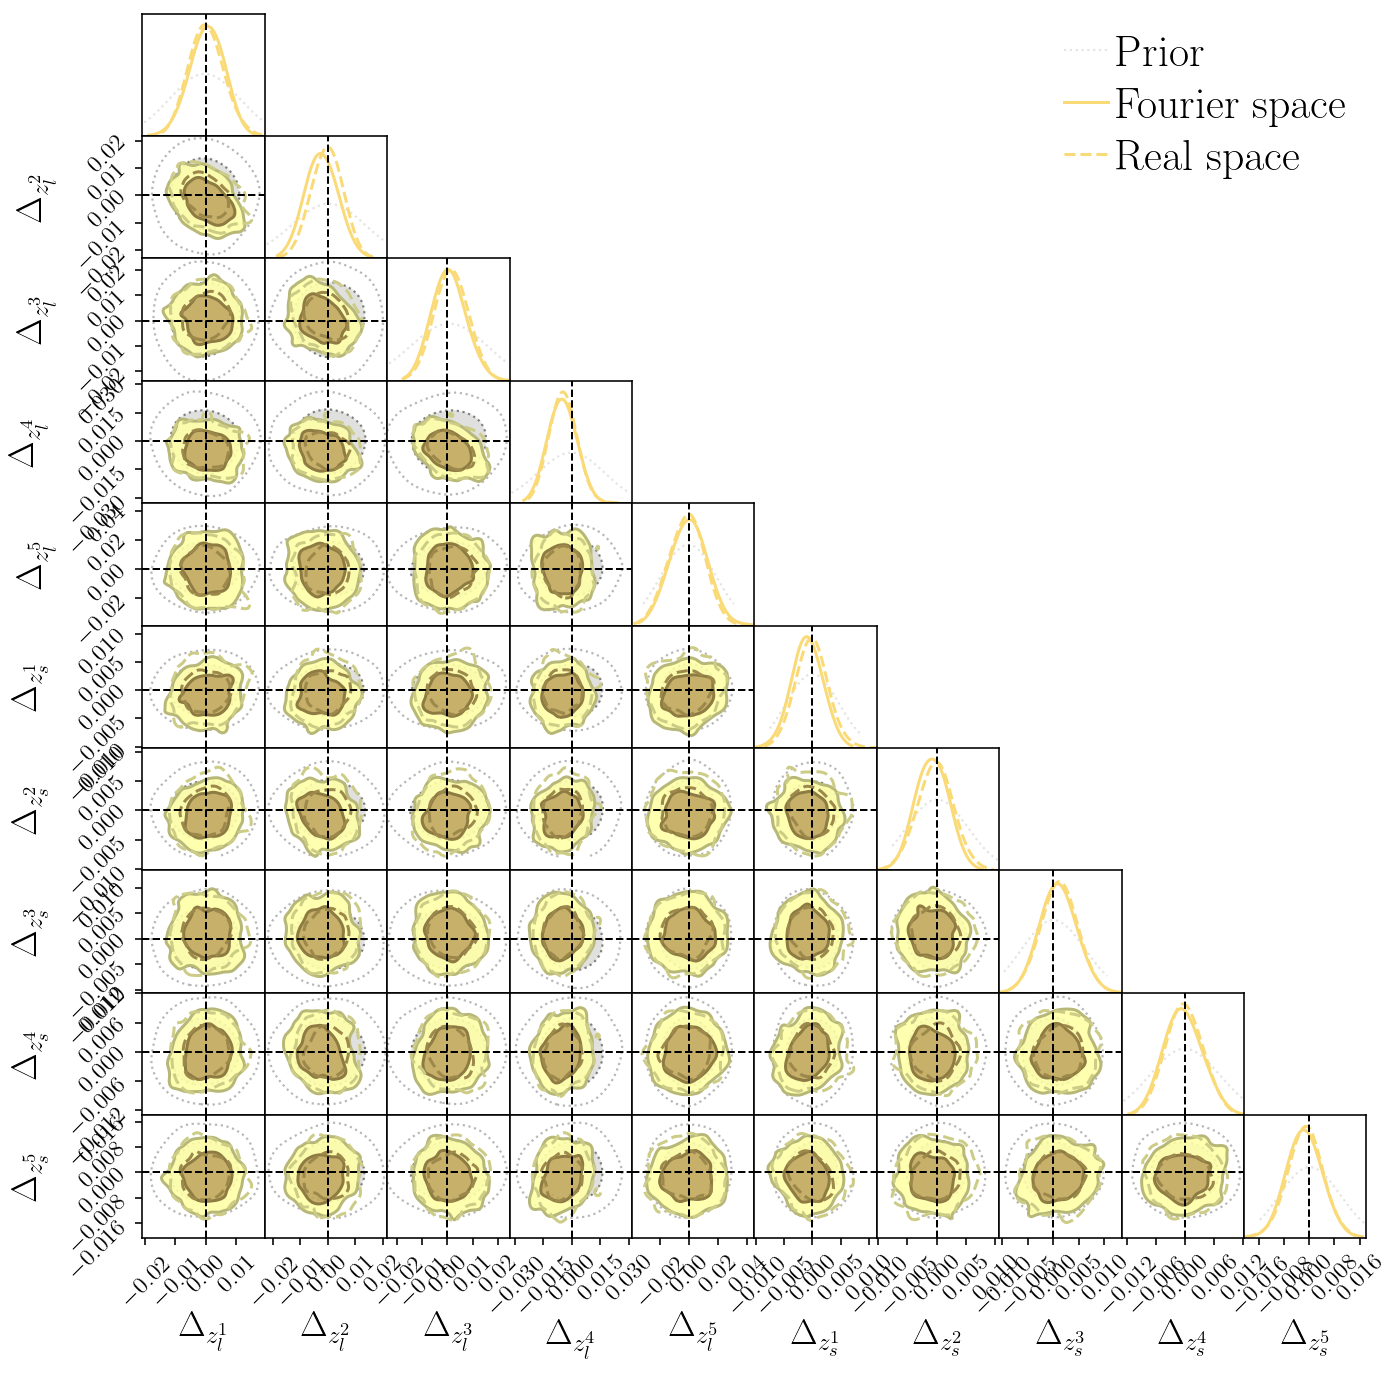

In [47]:
parnames = ['firecrown_two_pointlens_0_delta_z',
       'firecrown_two_pointlens_1_delta_z',
       'firecrown_two_pointlens_2_delta_z',
       'firecrown_two_pointlens_3_delta_z',
       'firecrown_two_pointlens_4_delta_z',
       'firecrown_two_pointsource_0_delta_z',
       'firecrown_two_pointsource_1_delta_z',
       'firecrown_two_pointsource_2_delta_z',
       'firecrown_two_pointsource_3_delta_z',
       'firecrown_two_pointsource_4_delta_z']

names = ['$\Delta_{z_l^1}$', '$\Delta_{z_l^2}$', '$\Delta_{z_l^3}$', '$\Delta_{z_l^4}$', '$\Delta_{z_l^5}$',
        '$\Delta_{z_s^1}$', '$\Delta_{z_s^2}$', '$\Delta_{z_s^3}$', '$\Delta_{z_s^4}$', '$\Delta_{z_s^5}$']
truths = np.array([0]*len(parnames))

# Lens then source
widths = np.array([0.0066,0.0075,0.0085, 0.0095,0.0105, 0.0026, 0.003, 0.0034, 0.0039, 0.0052])
prior = np.random.multivariate_normal(truths,np.diagflat(widths**2),1000)

# With EMCEE there are no weights
# Cosmo parameters
burnin = 150000

pars0 = get_indices(chainfile_0, parnames)
pars1 = get_indices(chainfile_1, parnames)

c = ChainConsumer()
c.add_chain(prior, parameters=names, name='Prior')
c.add_chain(chain_0[burnin:,pars0], parameters=names, name=name_0)
c.add_chain(chain_1[burnin:,pars1], parameters=names, name=name_1)

def call_configure(c):
    c.configure(kde=[3.,3.,3.,3.,3.0,1,1], shade=[True,True, False,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=[ "#E5E4E2",colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[ 1.1, 1.5, 1.5,1.5, 1.5, 1], linestyles=[":", "-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(5,5), truth=truths) #extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.6, -0.33), (-1.8, 1.)])
fig.set_size_inches(5. + fig.get_size_inches())
fig.savefig(dir[:-7] + 'plots/%s_%d_deltazs.png'%(name_plots, burnin), bbox_inches="tight", dpi=300)
fig.savefig(dir[:-7] + 'plots/%s_%d_deltazs.pdf'%(name_plots, burnin), bbox_inches="tight")

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{ccc}
        \hline
		Model & $A_{IA}$ & $\eta_{IA}$ \\ 
		\hline
		Fourier space & $0.026^{+0.038}_{-0.037}$ & $0.5\pm 2.1$ \\ 
		Real space & $0.049^{+0.046}_{-0.042}$ & $0.3^{+2.2}_{-2.0}$ \\ 
		\hline
    \end{tabular}
\end{table}


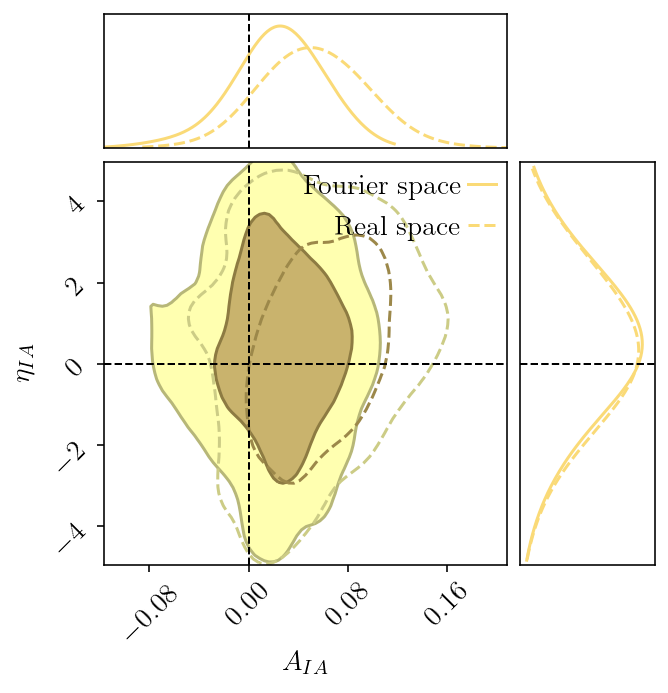

In [48]:
parnames = ['firecrown_two_pointia_bias',
       'firecrown_two_pointalphaz']
names = ['$A_{IA}$', r'$\eta_{IA}$']
truths = [0., 0.]

# With EMCEE there are no weights
# Cosmo parameters
burnin = 150000

pars0 = get_indices(chainfile_0, parnames)
pars1 = get_indices(chainfile_1, parnames)

c = ChainConsumer()

c.add_chain(chain_0[burnin:,pars0], parameters=names, name=name_0)
c.add_chain(chain_1[burnin:,pars1], parameters=names, name=name_1)

def call_configure(c):
    c.configure(kde=[3.,3.,3.,3.,3.0,1,1], shade=[True, False,False,False,False,False, False], shade_alpha=[0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=[ colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 14},
            legend_color_text=False, tick_font_size=14, label_font_size=14, linewidths=[ 1.5, 1.5,1.5, 1.5, 1], linestyles=["-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(2.5,2.5), truth=truths) #extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.6, -0.33), (-1.8, 1.)])
fig.set_size_inches(2. + fig.get_size_inches())
fig.savefig(dir[:-7] + 'plots/%s_%d_ia.png'%(name_plots, burnin),  bbox_inches="tight", dpi=300)
fig.savefig(dir[:-7] + 'plots/%s_%d_ia.pdf'%(name_plots, burnin),  bbox_inches="tight")